In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import integration as ig
import coordinates as coords
from matplotlib import interactive
interactive(True)
from sympy import symbols
from IPython.display import display
sy.init_printing(use_latex="png",scale=2)

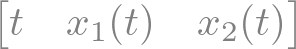

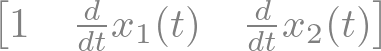

In [2]:
t,sigma,rs,c = symbols('t,sigma,r_s,c',real=True)
#x1 = sy.Function("x_1",real=True)(t)
x1 = sy.Function("x_1",real=True)(t)
x2 = sy.Function("x_2",real=True)(t)
r = sy.Array([t,x1,x2])
vx1 = sy.Derivative(x1,t)
vx2 = sy.Derivative(x2,t)
v = sy.Array([1,vx1,vx2])
display(r)
display(v)

In [3]:
# z = -1/sy.sqrt(x**2+y**2)
# sigma_val = 1.0
# z = -sy.exp(-(x**2+y**2)/(2*sigma))/(2*sy.pi*sy.sqrt(sigma))
# X1 = sy.MutableDenseMatrix([1,0,sy.diff(z,x)])
# X2 = sy.MutableDenseMatrix([0,1,sy.diff(z,y)])
# display(X1)
# display(X2)

In [4]:
# %matplotlib widget
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Make data.
# X = np.arange(-2, 2, 0.1)
# Y = np.arange(-2, 2, 0.1)
# X, Y = np.meshgrid(X, Y)
# Z = sy.lambdify([x,y,sigma],z)(X,Y,sigma_val)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap="jet", linewidth=0, antialiased=True)

# # Customize the z axis.
# #ax.set_zlim(-1.01, 1.01)
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

In [5]:
# X1X2 = sy.DotProduct(X1,X2).doit()
# X1X1 = sy.DotProduct(X1,X1).doit()
# X2X2 = sy.DotProduct(X2,X2).doit()

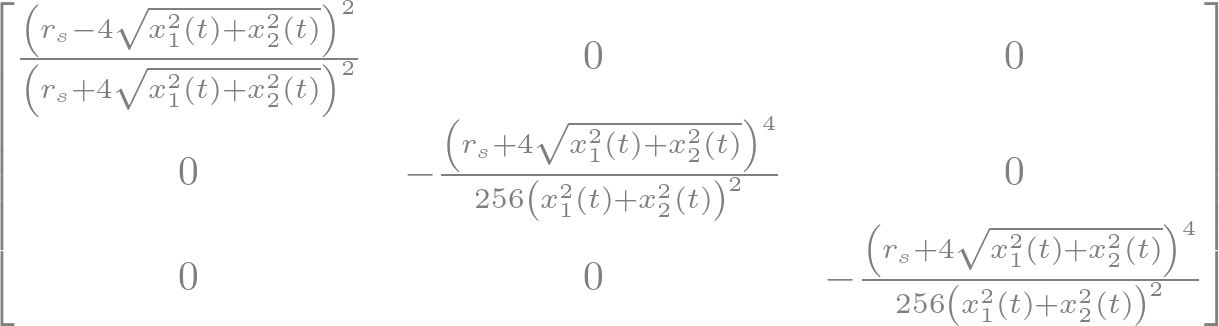

In [6]:
#g = sy.Matrix([[x**2+y**2,0],[0,x**2+y**2+1/(x**2+y**2)]])
#g = sy.Matrix([[1+x**2/(x**2+y**2)**3,x*y/(x**2+y**2)**3],[x*y/(x**2+y**2)**3,1+y**2/(x**2+y**2)**3]])
#g = sy.Matrix([[X1X1,X1X2],[X1X2,X2X2]])
#g = sy.Matrix([[(1-rs/sy.sqrt(x1**2+x2**2)),0,0],[0,sy.sin(sy.atan2(x2,x1))**2-sy.cos(sy.atan2(x2,x1))**2/(1-rs/sy.sqrt(x1**2+x2**2)),0],[0,0,sy.cos(sy.atan2(x2,x1))**2-sy.sin(sy.atan2(x2,x1))**2/(1-rs/sy.sqrt(x1**2+x2**2))]])
sy.sqrt(x1**2+x2**2)
g = sy.Matrix([[(1-rs/(4*sy.sqrt(x1**2+x2**2)))**2/(1+rs/(4*sy.sqrt(x1**2+x2**2)))**2,0,0],[0,-(1+rs/(4*sy.sqrt(x1**2+x2**2)))**4,0],[0,0,-(1+rs/(4*sy.sqrt(x1**2+x2**2)))**4]])
g = sy.simplify(g)
ndims = g.rows
display(g)

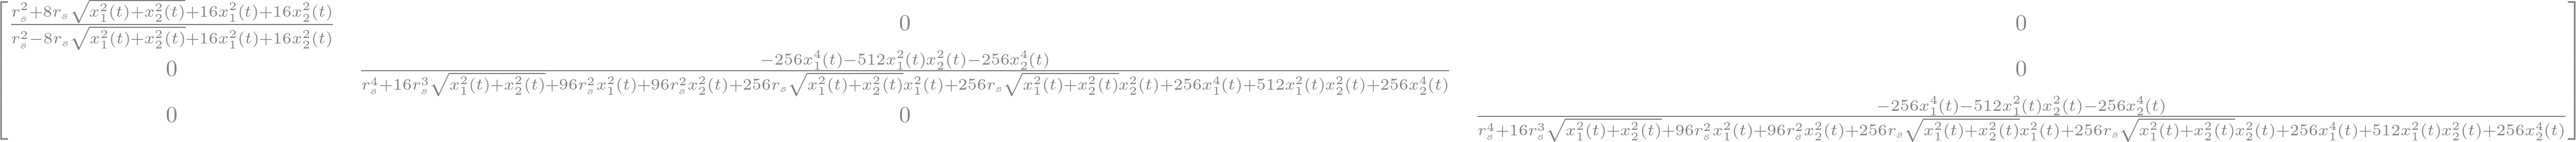

In [7]:
gi = g.inv()
#gi = sy.simplify(gi)
display(gi)

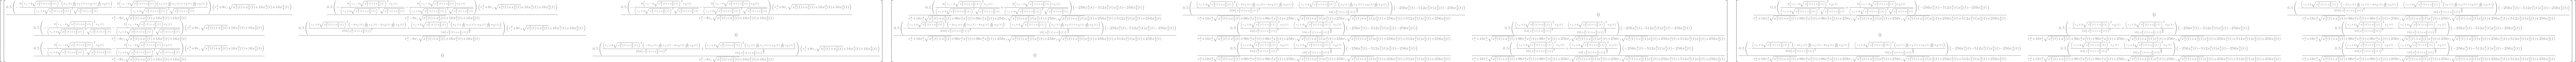

In [8]:
gamma = sy.MutableDenseNDimArray(np.zeros((ndims,ndims,ndims),dtype=int))
for i in range(ndims):
    for k in range(ndims):
        for l in range(ndims):
            for m in range(ndims):
                gamma[i,k,l] += 1/2*gi[i,m]*(sy.diff(g[m,k],r[l]) + sy.diff(g[m,l],r[k]) - sy.diff(g[k,l],r[m]))
#gamma = sy.simplify(gamma)
display(gamma)

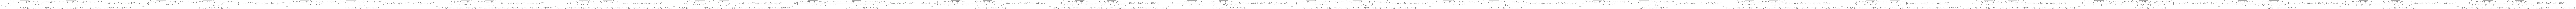

In [9]:
acc = sy.MutableDenseNDimArray(np.zeros((ndims),dtype=int))
for beta in range(ndims):
    for alpha in range(ndims):
        for nu in range(ndims):
            acc[nu] += -gamma[nu,alpha,beta]*v[alpha]*v[beta] + gamma[0,alpha,beta]*v[alpha]*v[beta]*v[nu]
#acc = sy.simplify(acc)
display(acc)

In [10]:
accx1 = sy.lambdify([x1,x2,vx1,vx2,c,rs],acc[1])
accx2 = sy.lambdify([x1,x2,vx1,vx2,c,rs],acc[2])

In [23]:
c_val = 1.0
rs_val = 0.0001
def accF(x,y,vx,vy):
    #r,phi,_ = coords.conv_coords([x,y,0], "cartesian", "cylindrical")
    #vr,vphi,_ = coords.conv_vec([x,y,0], [vx,vy,0], "cartesian", "cylindrical")
    #accr,accphi = accx1(r,phi,vr,vphi,c_val,rs_val),accx2(r,phi,vr,vphi,c_val,rs_val)
    #print(accr,",",accphi)
    #accx,accy,_ = coords.conv_vec([r,phi,0], [accr,accphi,0], "cylindrical", "cartesian")
    #print(r,",",phi)
    #print(vr,",",vphi)
    #return (accx,accy)
    return (accx1(x,y,vx,vy,c_val,rs_val),accx2(x,y,vx,vy,c_val,rs_val))
def accF_gravity(x,y,vx,vy):
    r = np.sqrt(x**2+y**2)
    return (-x/r**3,-y/r**3)

In [24]:
coords.conv_vec([2,0,0], [1,0,0], "cylindrical", "cartesian")

array([1, 0, 0])

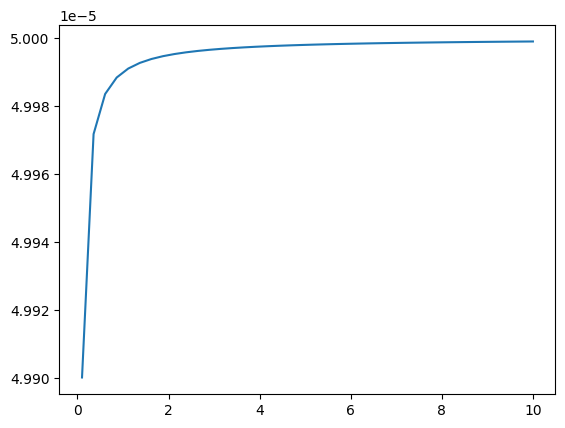

In [ ]:
%matplotlib inline
rs_val = 0.0001
testRs = np.linspace(0.1,10,40)
rel = []
for x in testRs:
    rel.append(accF(x,0,0,0)[0]/accF_gravity(x,0,0,0)[0])
plt.plot(testRs,rel)
plt.show()

In [36]:
rs_val = 0.0001
starts = []
for y in np.linspace(1.0,2.0,6):
    starts.append([0,y,-rs_val*40,0.0])

trajectories = []
for start in starts:
    taus, infos = ig.get_geodesic(start[0],start[1],start[2],start[3],accF,dt=1,N=1000)
    trajectories.append(infos[:2])

/tmp/ipykernel_32329/1911750906.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


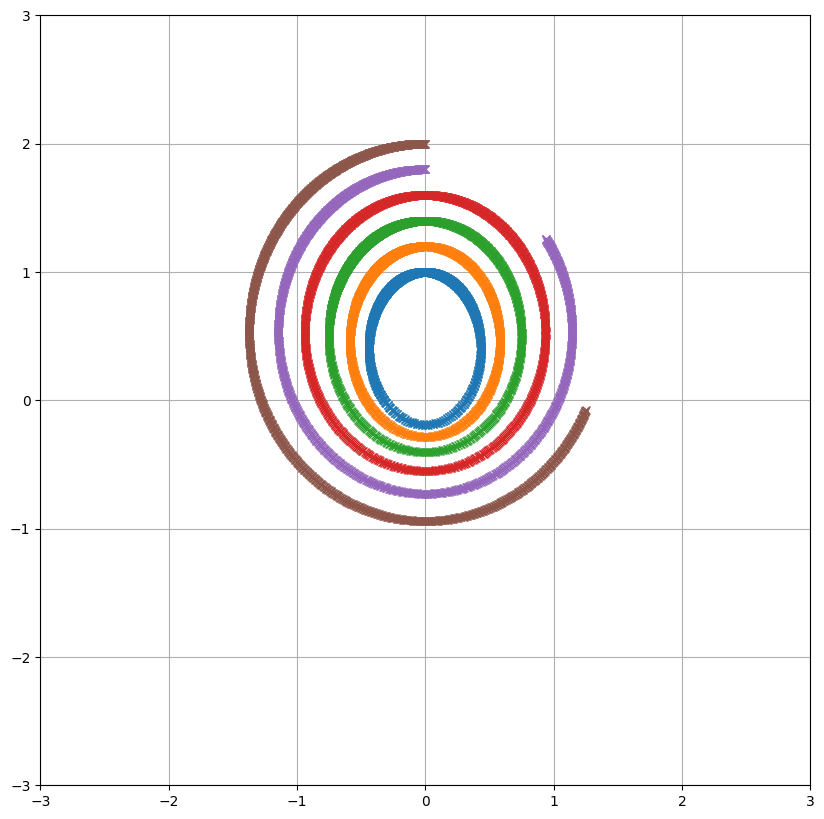

In [37]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_aspect(1.0)
for p in trajectories:
    ax.plot(p[0],p[1],marker="x")
vsize = 3
ax.set_xlim(-vsize,vsize)
ax.set_ylim(-vsize,vsize)
ax.grid()
fig.show()

In [38]:
starts = []
rs_val = 1.0

for y in np.linspace(7.6,9,2):
    starts.append([0,y,-0.22,0.0])
for y in np.linspace(4.0,10,5):
    starts.append([20,y,-0.5,0.0])

trajectories = []
for start in starts:
    taus, infos = ig.get_geodesic(start[0],start[1],start[2],start[3],accF,dt=0.5,N=2000)
    trajectories.append(infos[:2])

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 0.5*_Dummy_586**2*_Dummy_587*((1/256)*(r_s + 4*sqrt(_Dummy_588**2 + _Dummy_589**2))**4*(-4*_Dummy_586*_Dummy_588 - 4*_Dummy_587*_Dummy_589)/(_Dummy_588**2 + _Dummy_589**2)**3 + (1/16)*(r_s + 4*sqrt(_Dummy_588**2 + _Dummy_589**2))**3*(_Dummy_586*_Dummy_588 + _Dummy_587*_Dummy_589)/(_Dummy_588**2 + _Dummy_589**2)**(5/2))*(16*_Dummy_588**2 + 16*_Dummy_589**2 + r_s**2 + 8*r_s*sqrt(_Dummy_588**2 + _Dummy_589**2))/(16*_Dummy_588**2 + 16*_Dummy_589**2 + r_s**2 - 8*r_s*sqrt(_Dummy_588**2 + _Dummy_589**2)) - 0.5*_Dummy_586**2*(-1/64*_Dummy_589*(r_s + 4*sqrt(_Dummy_588**2 + _Dummy_589**2))**4/(_Dummy_588**2 + _Dummy_589**2)**3 + (1/16)*_Dummy_589*(r_s + 4*sqrt(_Dummy_588**2 + _Dummy_589**2))**3/(_Dummy_588**2 + _Dummy_589**2)**(5/2))*(-256*_Dummy_588**4 - 512*_Dummy_588**2*_Dummy_589**2 - 256*_Dummy_589**4)/(256*_Dummy_588**4 + 512*_Dummy_588**2*_Dummy_589**2 + 96*_Dummy_588**2*r_s**2 + 256*_Dummy_588**

/tmp/ipykernel_32329/3091362872.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


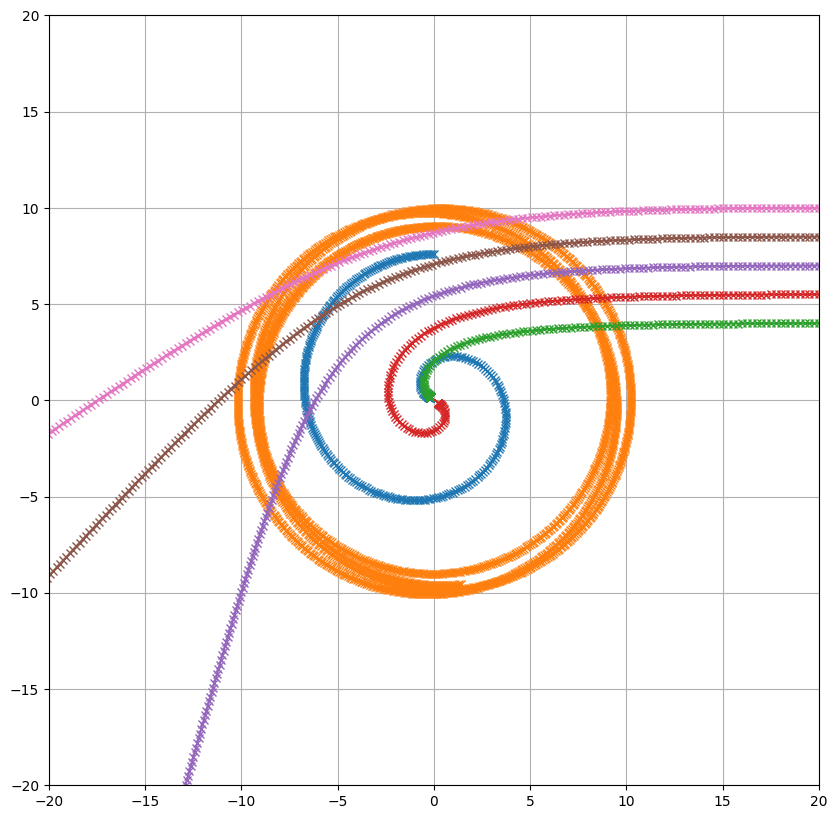

In [39]:
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_aspect(1.0)
for p in trajectories:
    ax.plot(p[0],p[1],marker="x")
vsize = 20
ax.set_xlim(-vsize,vsize)
ax.set_ylim(-vsize,vsize)
ax.grid()
fig.show()